In [1]:
commonWordList = []
for line in open('common.txt', 'r'):
    line = line.lower()
    line = line.split()
    commonWordList += line

In [2]:
# %load nettalk.py
#!/usr/bin/python

from mapping import *
from  misc import *
from ann import *
from pybrain import *
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet

#main nettalk implementation

def load_nettalk_data(filename):
    data = []
    file = open(filename,'r')
    for line in file:
        #print items
        data.append(line)
#     shuffle(data)
    retData = []
    for line in data:
        line = line.split()
        retData.append(line)
    #print data
    return retData

delta = []
values = []
weights = []
gradient = []
eta = 1.0
a = .9
passes = 1 #number of passes through the set
words = 20007 #number of words to use
offset = 0 #offset from the beginning of the list
groupSize = 29 #size of the input group for each character
margin = 3 #number of characters on either side of the current character
frame = 2*margin+1 #total size of the character window
input = frame * groupSize #total number of input units
topology = [input,20,26]
charIndex = [] #this holds the start indices for each input group
for i in xrange(0,input,groupSize):
    charIndex.append(i)

allocate_lists(topology,values,weights,delta,gradient)

r.seed(5890)
initialize_weights(weights,topology)


#print charIndex
datasets = load_nettalk_data('list')
#print data

# data = [SupervisedDataSet(input, 26) for i in xrange(147)]
data = SupervisedDataSet(input, 26)
phonenemsData = SupervisedDataSet(input, 21)
stressesData = SupervisedDataSet(input, 5)
tmp = []

count = 0
for i in xrange(passes):
    numCorrect = 0
    total = 0
    averageError = 0
    for word in xrange(words):
        if datasets[word][0] not in commonWordList:
            continue
        count += 1
        tmp.append(datasets[word][0])
        #print 'word: ', data[word][0]
        strlen = len(datasets[word][0])
        for pos in xrange(strlen):
            #print 'position: ',pos
            start = pos - margin
            end = pos + margin + 1
            window = []
            index = 0
            for j in xrange(start,end):
                if(j < 0 or j >= strlen):
                    newChar = '-'
                else:
                    newChar = datasets[word][0][j]
                converted = map_char(newChar)
                window += converted
                index += 1
            #print values[0]

            #set the desired output, get the phoneme and stress vectors and join them
            pVector = map_phoneme(datasets[word][1][pos])
            sVector = map_stress(datasets[word][2][pos])
            desired = pVector + sVector
            #print desired

            #add SupervisedDataSet data
#             data[count/1000].addSample(window ,desired)
            data.addSample(window ,desired) 
            
            phonenemsData.addSample(window, pVector)
            stressesData.addSample(window, sVector)
            
print 'datasets are ready!'

datasets are ready!


In [3]:
net0 = buildNetwork(input, 26, hiddenclass=SigmoidLayer)
net15 = buildNetwork(input, 15, 26, hiddenclass=SigmoidLayer)
net30 = buildNetwork(input, 30, 26, hiddenclass=SigmoidLayer)
net60 = buildNetwork(input, 60, 26, hiddenclass=SigmoidLayer)
net120 = buildNetwork(input, 120, 26, hiddenclass=SigmoidLayer)

In [11]:
errList = [[1] for i in xrange(5)]
NOSample = 30
trainer0 = BackpropTrainer(net0, data, weightdecay=0.9)
trainer15 = BackpropTrainer(net15, data, weightdecay=0.9)
trainer30 = BackpropTrainer(net30, data, weightdecay=0.9)
trainer60 = BackpropTrainer(net60, data, weightdecay=0.9)
trainer120 = BackpropTrainer(net120, data, weightdecay=0.9)
for i in xrange(NOSample):
#     trainer0.setData(data[i])
#     trainer15.setData(data[i])
#     trainer30.setData(data[i])
#     trainer60.setData(data[i])
#     trainer120.setData(data[i])
    err0 = trainer0.train()
    err60 = trainer60.train()
    err30 = trainer30.train()
    err15 = trainer15.train()
    err120 = trainer120.train()
    errList[0].append(err0)
    errList[1].append(err15)
    errList[2].append(err30)
    errList[3].append(err60)
    errList[4].append(err120)

In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [12]:
accList = [[1 - j for j in i] for i in errList]

In [13]:
labelList = [0, 15, 30, 60, 120]

ValueError: x and y must have same first dimension

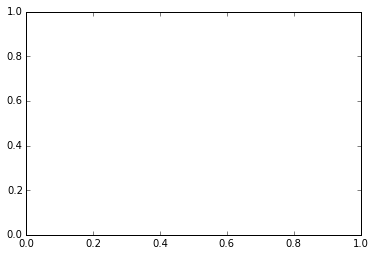

In [14]:
for i in xrange(len(accList)):
    plt.plot(range(4), accList[i], label=labelList[i])
plt.legend(loc='lower right', frameon=False)
plt.show()

In [ ]:
netPhonenems = buildNetwork(29, 120, 21, hiddenclass=SigmoidLayer)
netStresses = buildNetwork(29, 120, 5, hiddenclass=SigmoidLayer)

In [ ]:
trainer0 = BackpropTrainer(netPhonenems, phonenemsData)
trainer60 = BackpropTrainer(netStresses, stressesData)

In [64]:
print accList

[[0.98079428433000604, 0.98146154690403065, 0.98181444759289038], [0.97112419386897242, 0.97332248894269346, 0.9747659204080743], [0.97395786904957504, 0.97592448685854027, 0.97739231311394481], [0.97639033959464816, 0.9776184109817101, 0.9785798522980832], [0.97349565539884297, 0.97644667617709036, 0.97788806918059712]]


In [61]:
print errList

[[0.01920571566999394, 0.01853845309596933, 0.018185552407109642], [0.028875806131027575, 0.026677511057306532, 0.025234079591925723], [0.026042130950425003, 0.024075513141459767, 0.022607686886055241], [0.023609660405351847, 0.022381589018289953, 0.021420147701916813], [0.02650434460115705, 0.02355332382290961, 0.022111930819402846]]
